<a href="https://colab.research.google.com/github/MaddoSaru/deeplearning-az/blob/master/RNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Deep Learning***

# **Redes Neuronales Recurrentes (RNR)**

**Parte 1 - Preprocesado de datos**

In [1]:
# Importar las librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importar el dataset de entrenamiento

dataset_train = pd.read_csv("https://raw.githubusercontent.com/MaddoSaru/deeplearning-az/master/datasets/Part%203%20-%20Recurrent%20Neural%20Networks%20(RNN)/Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Escalado de características

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Crear estructura de datos con 60 timesteps y 1 salida

X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Rendimiento de los datos

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**Parte 2 - Construcción de la RNR**

In [7]:
# Importar librerías de Keras

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [10]:
regressor = Sequential()

In [11]:
# Añadir la primera capa de LSTM y la regulación por Dropout

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

In [12]:
# Añadir la segunda capa de LSTM y la regulación por Dropout

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Añadir la tercera capa de LSTM y la regulación por Dropout

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# Añadir la cuarta capa de LSTM y la regulación por Dropout

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [15]:
# Añadir la capa de salida

regressor.add(Dense(units = 1))

In [16]:
# Compilar la RNR

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
# Ajustar la RNR al conjunto de entrenamiento

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0346
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0056
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0060
Epoch 7/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0045
Epoch 13/100


**Parte 3 - Ajustar las predicciones y visualizar los resultados**

In [18]:
# Obtener el valor de las acciones reales de Enero 2017


dataset_test = pd.read_csv("https://raw.githubusercontent.com/MaddoSaru/deeplearning-az/master/datasets/Part%203%20-%20Recurrent%20Neural%20Networks%20(RNN)/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

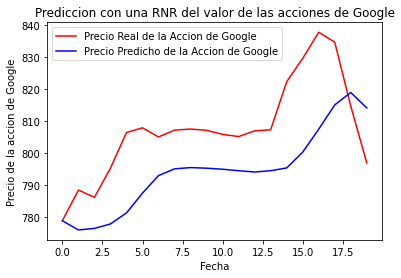

In [19]:
# Obtener la predicción de la acción con la RNR para Enero 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizar los Resultados
plt.plot(real_stock_price, color = 'red', label = 'Precio Real de la Accion de Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Precio Predicho de la Accion de Google')
plt.title("Prediccion con una RNR del valor de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Precio de la accion de Google")
plt.legend()
plt.show()